In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/DenoisingProject/

/content/gdrive/MyDrive/DenoisingProject


In [4]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from data_utils import load_images, split_data
from model_utils import create_denoise_model
from training_utils import generate_data, train_model

In [4]:
# Load data
# dataset link https://drive.google.com/drive/folders/1aPYhMy4qAPEAhE83JdEm800T1NYoSuvv?usp=drive_link
train_high = load_images('/content/gdrive/MyDrive/dataset/trainsplit/high')
train_low = load_images('/content/gdrive/MyDrive/dataset/trainsplit/low')
test_high = load_images('/content/gdrive/MyDrive/dataset/testsplit/high')
test_low = load_images('/content/gdrive/MyDrive/dataset/testsplit/low')


In [ ]:
# Build and train model
denoise_model = create_denoise_model(input_shape=(None, None, 3))
denoise_model = train_model(denoise_model, train_low, train_high, epochs=15)


Epoch 1/15
436/436 [==============================] - 571s 1s/step - loss: 0.0251 - psnr_metric: 17.3395
Epoch 2/15
436/436 [==============================] - 542s 1s/step - loss: 0.0221 - psnr_metric: 17.8499
Epoch 3/15
436/436 [==============================] - 540s 1s/step - loss: 0.0210 - psnr_metric: 18.0834
Epoch 4/15
436/436 [==============================] - 538s 1s/step - loss: 0.0204 - psnr_metric: 18.1783
Epoch 5/15
436/436 [==============================] - 538s 1s/step - loss: 0.0199 - psnr_metric: 18.2689
Epoch 6/15
436/436 [==============================] - 537s 1s/step - loss: 0.0197 - psnr_metric: 18.3327
Epoch 7/15
436/436 [==============================] - 536s 1s/step - loss: 0.0193 - psnr_metric: 18.4110
Epoch 8/15
436/436 [==============================] - 535s 1s/step - loss: 0.0188 - psnr_metric: 18.4936
Epoch 9/15
436/436 [==============================] - 534s 1s/step - loss: 0.0185 - psnr_metric: 18.5625
Epoch 10/15
436/436 [==============================] - 

In [8]:
denoise_model.save('/content/gdrive/MyDrive/DenoisingProject/denoising_model.h5')

In [8]:
from evaluation_utils import psnr_metric, compute_psnr, denoise_img

# Load the model
denoise_model = load_model('/content/gdrive/MyDrive/DenoisingProject/denoising_model.h5',
                           custom_objects={'psnr_metric': psnr_metric})

denoise_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       896       ['img[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)           (None, None, None, 32)       9248      ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, None, None, 32)       9248      ['conv2d_1[0][0]']            
                                                                                              

In [13]:
# Test the model
psnr_values = compute_psnr(denoise_model, test_low, 8)

# Calculate average PSNR
average_psnr = np.mean(psnr_values)
print(f"Average PSNR value: {average_psnr}")

1/1 [==============================] - 0s 19ms/step
PSNR Value for Image 1: 24.816741943359375
1/1 [==============================] - 0s 21ms/step
PSNR Value for Image 2: 31.296064376831055
1/1 [==============================] - 0s 18ms/step
PSNR Value for Image 3: 29.32737922668457
1/1 [==============================] - 0s 22ms/step
PSNR Value for Image 4: 25.100675582885742
1/1 [==============================] - 0s 44ms/step
PSNR Value for Image 5: 30.48931312561035
1/1 [==============================] - 0s 28ms/step
PSNR Value for Image 6: 30.556856155395508
1/1 [==============================] - 0s 30ms/step
PSNR Value for Image 7: 28.675508499145508
1/1 [==============================] - 0s 30ms/step
PSNR Value for Image 8: 26.078210830688477
1/1 [==============================] - 0s 18ms/step
PSNR Value for Image 9: 25.696434020996094
1/1 [==============================] - 0s 19ms/step
PSNR Value for Image 10: 26.081710815429688
1/1 [==============================] - 0s 18ms/step

### Average PSNR value: 27.066951751708984

In [6]:
from evaluation_utils import denoise_img,psnr_metric,plot_denoised_img
from matplotlib import pyplot as plt

###Some Denoised Images Output
Actual Image Vs Denoised Image

1/1 [==============================] - 0s 28ms/step


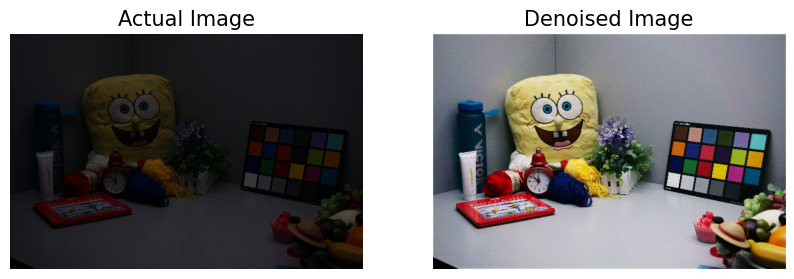

PSNR Value: 24.004528


In [23]:
#To plot denoised image run polt_denoised_img(low_test_img,index,Image index in low_test_img,denoising model)
plot_denoised_img(test_low,8,15,denoise_model)

1/1 [==============================] - 0s 23ms/step


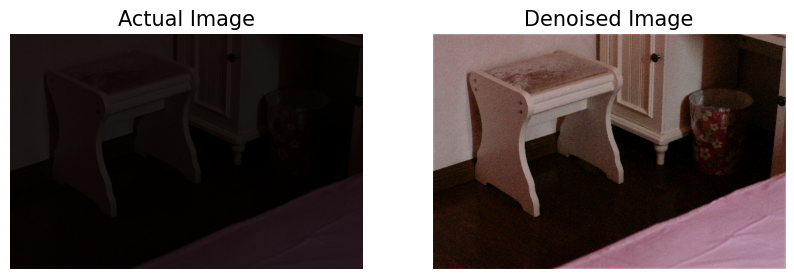

PSNR Value: 26.07821


In [19]:
plot_denoised_img(test_low,8,7,denoise_model)

1/1 [==============================] - 0s 20ms/step


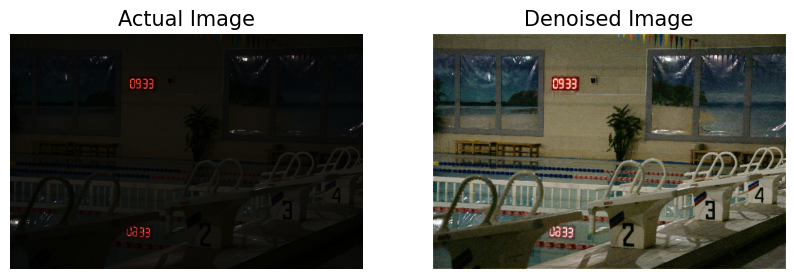

PSNR Value: 25.747572


In [22]:
plot_denoised_img(test_low,8,37,denoise_model)